![pydatalogo](https://user-images.githubusercontent.com/7065401/46249227-f76b1d80-c3fb-11e8-931e-8a9adc12bd4e.png)

<div style="color: #444; text-align: center;">
    <b>Córdoba 2018</b>
    <br>
    <span>Matías Caputti</span>
</div>

---

# Image manipulation with OpenCV

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Installing OpenCV

Install **OpenCV** using `pip install opencv-python`.

In [2]:
import cv2

## What is color and how it's represented digitally?

There are multiple ways of representing color digitally, the most common one is the [RGB Color Model](https://en.wikipedia.org/wiki/RGB_color_model).

In the RGB Color model, any color is represented as a combination of Red, Green and Blue.

![RGB Color Model](https://upload.wikimedia.org/wikipedia/commons/c/c2/AdditiveColor.svg)

Examples:

<p style="border: 3px rgb(255, 0, 0) solid; padding: 3px;">
    R: 255, G: 0, B:0
</p>

<p style="border: 3px rgb(0, 255, 0) solid; padding: 3px;">
    R: 0, G: 255, B: 0
</p>

<p style="border: 3px rgb(0, 0, 255) solid; padding: 3px;">
    R: 0, G: 0, B: 255
</p>

---

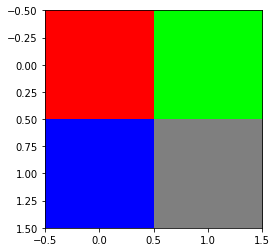

In [3]:
color_1 = [255, 0, 0]      # red
color_2 = [0, 255, 0]      # green
color_3 = [0, 0, 255]      # blue
color_4 = [127, 127, 127]  # grey
plt.imshow(np.array([
    [color_1, color_2],
    [color_3, color_4],
]))

By tuning the levels of R, G and B, you can generate more colors:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/RGB_color_solid_cube.png/1600px-RGB_color_solid_cube.png" width=600 />

## What is an image?

An image is just a "matrix" of "pixels", each one of a different color:

![246x0w](https://user-images.githubusercontent.com/872296/45115196-89497880-b125-11e8-87cb-6bc42b561e5f.jpg)

## Images in Python

With the help of numpy, we can represent images as simple arrays of pixels:

Each value in the BGR 3-tuple has a range of `[0, 255]`. How many color possibilities are there for each pixel in an RGB image in OpenCV? That’s easy: `256 * 256 * 256 = 16.777.216`.

(2, 2, 3)


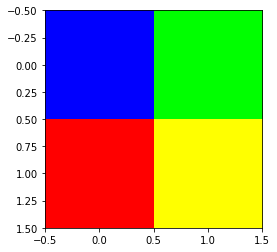

In [4]:
colors = [
    [
        [0, 0, 255], # blue
        [0, 255, 0] # green
    ],
    [
        [255, 0, 0], # red
        [255, 255, 0] # yellow
    ]
]

print(np.array(colors).shape)

plt.imshow(colors)

Numpy is great at managing matrices and multi-dimensional arrays (cubes, tensors, etc). A picture then is just a 3d structure. Each "pixel" is represented as a vector of R, G, B (`[255, 0, 0]`).

(2, 2, 3)


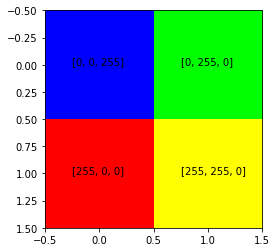

In [5]:
colors = [
    [
        [0, 0, 255], # blue
        [0, 255, 0]  # green
    ],
    [
        [255, 0, 0],  # red
        [255, 255, 0] # yellow
    ]
]

print(np.array(colors).shape)

plt.imshow(colors)
start_row = 0
for row in colors:
    start_col = -0.25
    for color in row:
        plt.text(start_col, start_row, str(color))
        start_col += 1
    start_row += 1

### Opacity

Also we can give opacity to our image by setting a new dimension of each pixel, known as `alpha channel`.

(2, 2, 4)


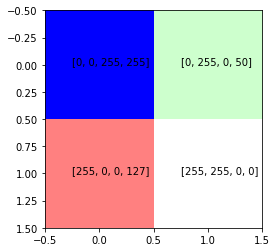

In [6]:
colors = [
    [
        [0, 0, 255, 255], # blue
        [0, 255, 0, 50]  # green
    ],
    [
        [255, 0, 0, 127],  # red
        [255, 255, 0, 0] # yellow
    ]
]

print(np.array(colors).shape)

plt.imshow(colors)
start_row = 0
for row in colors:
    start_col = -0.25
    for color in row:
        plt.text(start_col, start_row, str(color))
        start_col += 1
    start_row += 1

Real images are just much larger structures of pixels. For example, a Full HD picture is 1920x1080 pixels. But each pixel is a vector of 3 elements, so its final shape would be: `1920x1080x3`.

(2, 2, 3)


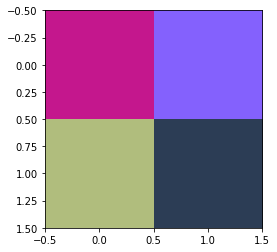

In [7]:
SIZE = 2
#SIZE = 10
#SIZE = 100

colors = np.array(
    np.array([
        np.array([np.random.randint(0, 255, 3) for x in range(SIZE)]) for x in range(SIZE)
    ])
)

print(np.array(colors).shape)

plt.imshow(colors)

## Playing with OpenCV

OpenCV (Open Source Computer Vision Library) is a library that has many features, tools, algorithms and utilities to manage images and image related resources (like cameras).

Let's see it in action:

In [8]:
# read image
image = cv2.imread("./data/pydata.png")

In [9]:
type(image)

numpy.ndarray

As you can see, images are read as regular numpy arrays:

In [10]:
image.shape

(277, 498, 3)

We can visualize the image at any moment with matplotlib:

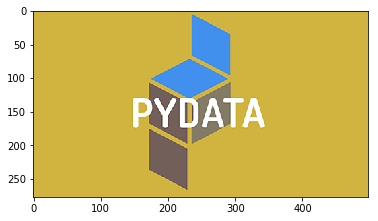

In [11]:
plt.imshow(image)

### Using RGB pixel format

OpenCV uses by default the BGR pixel format (or color mode). The most common standard for computers and libraries (like matplotlib) is RGB. It's simple to convert from BGR to RGB:

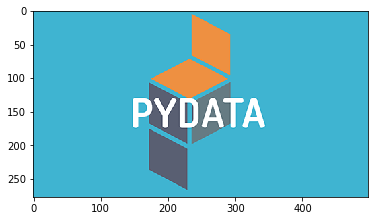

In [12]:
# parse BRG to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show image
plt.imshow(image)

### Using grayscale

We can use a similar approach to transform our image to gray scale:

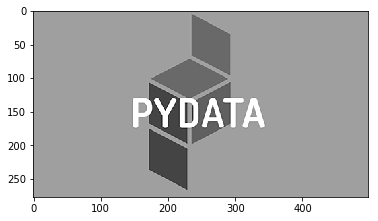

In [13]:
# parse image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# show image
plt.imshow(gray, cmap='gray')

### Resizing images

Resizing images is important for a number of reasons. First, you might want to resize a large image to fit on your screen. Image processing is also faster on smaller images because there are fewer pixels to process. In the case of deep learning, we often resize images, ignoring aspect ratio, so that the volume fits into a network which requires images of certain dimensions.

Note the resizing will deform the image a little bit. It is important to analyze this effect during the exploratory phase, as it can have a negative effect on the results of your model. Flowers and animals might be ok with a little stretching or squeezing, but facial features may not.

This can happen when the dimensions of the original image are not proportionally exact to your desired size. Let's try another strategy of rescaling the image and maintaining the aspect ratio.

In [14]:
WIDTH = 300
HEIGHT = 300

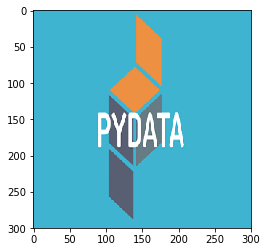

In [15]:
# resize, ignoring aspect ratio
resized = cv2.resize(image, (WIDTH, HEIGHT))

# show image
plt.imshow(resized)

### Rescaling images

If you imagine portait images versus landscape images you’ll know that there are a lot of things that can get messed up by doing a slopping resize. Rescaling is assuming that you’re locking down the aspect ratio to prevent distortion in the image. In this case, we’ll scale down the image to the shortest side that matches with the model’s input size.

- Landscape: limit resize by the height
- Portrait: limit resize by the width

At this point only one dimension is set to what the model’s input requires. We still need to crop one side to make a square.

1.7978339350180506


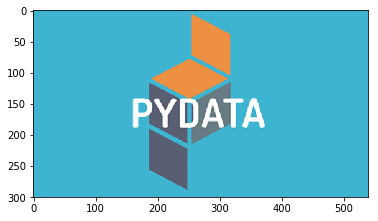

In [16]:
aspect = image.shape[1] / float(image.shape[0])
print(aspect)

if(aspect > 1):
    # landscape orientation - wide image
    res = int(aspect * HEIGHT)
    scaled = cv2.resize(image, (res, HEIGHT))
if(aspect < 1):
    # portrait orientation - tall image
    res = int(WIDTH / aspect)
    scaled = cv2.resize(image, (WIDTH, res))
if(aspect == 1):
    scaled = cv2.resize(image, (WIDTH, HEIGHT))

# show image
plt.imshow(scaled)

### Cropping

There are a variety of strategies we could utilize. In fact, we could backpeddle and decide to do a center crop. So instead of scaling down to the smallest we could get on at least one side, we take a chunk out of the middle. If we had done that without scaling we would have ended up with just part of a flower pedal, so we still needed some resizing of the image.

Below we’ll try a few strategies for cropping:

- Just grab the exact dimensions you need from the middle!
- Resize to a square that’s pretty close then grab from the middle.
- Use the rescaled image and grab the middle.

As you can see that didn’t work out so well, except for maybe the last one. The middle one may be just fine too, but you won’t know until you try on the model and test a lot of candidate images. At this point we can look at the difference we have, split it in half and remove some pixels from each side. This does have a drawback, however, as an off-center subject of interest would get clipped.

If you’ve run this tutorial a few times now and are on Round 3, you’ll notice a pretty big problem. You’re missing astronaughts! You can still see the issue with the flower from Round 2 as well. Things are missing after the cropping and that could cause you problems. Think of it this way: if you don’t know how the model you’re using was prepared then you don’t know how to conform your images, so take care to test results! If the model used a lot of different aspect ratio images and just squeezed them to conform to a square then there’s a good chance that over time and lots of samples it “learned” what things look like squeezed and can make a match. However, if you’re looking for details like facial features and landmarks, or really nuanced elements in any image, this could be dangerous and error-prone.

Another strategy would be to rescale to the best size you can, with real data, but then pad the rest of the image with information that you can safely ignore in your model. We’ll save that for another tutorial though since you’ve been through enough here!


> Scaled seems to be the best option.

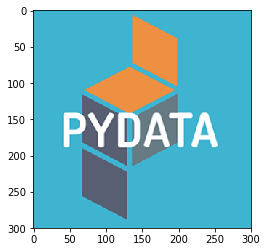

In [17]:
def crop_center(img, cropx, cropy):
    y,x,c = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,
               startx:startx+cropx]
    # yes, the function above should match resize and take a tuple...

# Scaled image
cropped = crop_center(scaled, WIDTH, WIDTH)

# show image
plt.imshow(cropped, cmap='gray')

## Drawing on an image

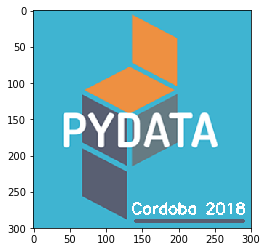

In [18]:
image = cropped.copy()

# add text
cv2.putText(image, "Cordoba 2018", (135, 280), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

# add line
cv2.line(image, (140, 290), (290, 290), (89, 95, 114), 3)

# show image
plt.imshow(image, cmap='gray')

---
## Your assignment!

- Generate a random 200*200 pixel image.
- Add some text on it!

In [8]:
# your code goes here...


<img src="https://camo.githubusercontent.com/53f6fb6ccefefd87dc93af20b8e7972573de9828/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f33393131393531382d35396661353163652d343665632d313165382d383530332d3566383133363535386632622e706e67">

<a href="https://rmotr.com" target="_blank"><img src="https://camo.githubusercontent.com/cc5541fa8bc6f822cb8d5b4261a23f20ec8321f4/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f33393131393438362d34373138653338362d343665632d313165382d396663332d3532353061343965663537302e706e67">
</a>